In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
vehicles_list = ['ICEV','PHEV','BEV','FCEV']
demand_list = ['normal','EU100','EU0']
demand_label = {'normal':'Based on Actual Market Shares',
                'EU100':'All Served by EU Product',
                'EU0':'All served by NON EU Product'}

scenario_list = ["Projection-APS","Projection-STEPS"]

high_emission_sectors = ["Electricity by petroleum and other oil derivatives","Electricity by coal", "Electricity by gas"]
low_emission_sectors = ['Electricity by nuclear','Electricity by hydro','Electricity by wind','Electricity by biomass and waste','Electricity by solar photovoltaic','Electricity by solar thermal','Electricity by tide, wave, ocean','Electricity by Geothermal',"Electricity nec"]
column_list = high_emission_sectors + low_emission_sectors

# Specify custom colors
colors = {
    'Electricity by petroleum and other oil derivatives': '#ff0000',  # red
    'Electricity by coal': '#ab3f1f',  # light red
    'Electricity by gas': '#ff8080',  # lighter red
    'Electricity by nuclear': '#599c6a',  # light green
    'Electricity by hydro': '#46c29d',  # green
    'Electricity by wind': '#84c246',  # darker green
    'Electricity by biomass and waste': '#33ff33',  # dark green
    'Electricity by solar photovoltaic': '#d3e340',  # green
    'Electricity by solar thermal': '#00e600',  # dark green
    'Electricity by tide, wave, ocean': '#00cc00',  # darker green
    'Electricity by Geothermal': '#009900',  # dark green
    'Electricity nec': '#006600'  # darkest green
}

In [8]:
file_path = "data/outlook_emix_STD.csv"
outlook_final = pd.read_csv(file_path)

outlook_final.set_index(["SCENARIO","REGION","YEAR"], inplace=True)

outlook_final = outlook_final[column_list]
# to make the horizontal axes even (only year 2030, 2050)
outlook_final = outlook_final.loc[outlook_final.index.get_level_values('YEAR').isin([2030, 2050])]

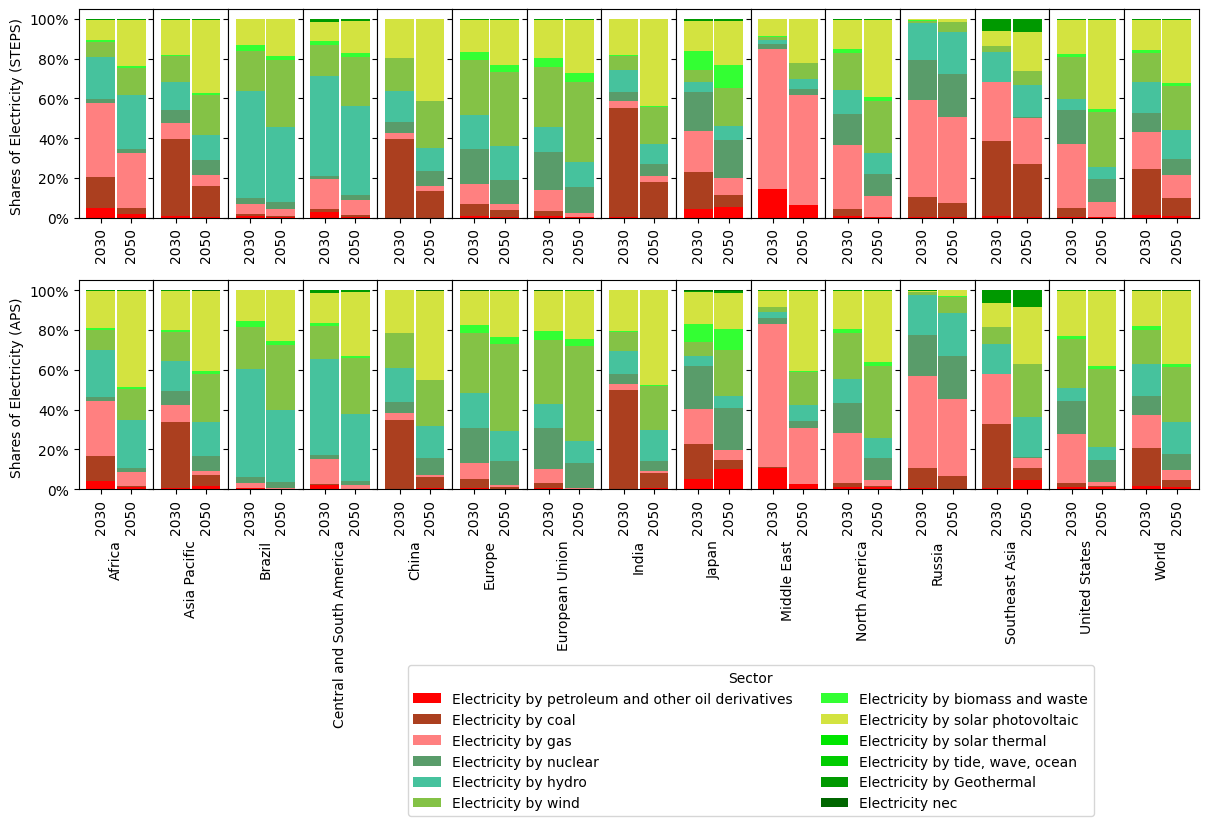

In [9]:

fig_width=14
fig_height=6
bar_width = 0.95
region_list = outlook_final.index.get_level_values("REGION").unique()

fig, axes = plt.subplots(nrows=2,ncols=len(region_list), figsize=(fig_width, fig_height),sharey=True)

axes_row = axes[0]
data = outlook_final.loc["Stated Policies Scenario"]
for ax, reg in zip(axes_row,region_list):
    df = data.loc[reg]
    df.plot(kind='bar', stacked=True, width=bar_width ,ax=ax,color=[colors[col] for col in df.columns])
    ax.set_ylabel('Shares of Electricity (STEPS) ')
    ax.set_xlabel(None)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.get_legend().set_visible(False)

axes_row = axes[1]
data = outlook_final.loc["Announced Pledges Scenario"]
for ax, reg in zip(axes_row,region_list):
    df = data.loc[reg]
    df.plot(kind='bar', stacked=True, width=bar_width ,ax=ax,color=[colors[col] for col in df.columns])
    ax.set_ylabel('Shares of Electricity (APS) ')
    ax.set_xlabel(f'{reg}',rotation=90)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.get_legend().set_visible(False)


# Move the legend outside the plot
axes_row[-1].legend(title='Sector',  bbox_to_anchor=(-5, -1.6), loc='lower center',ncol=2)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0, hspace=0.3)
#plt.tight_layout()
#plt.suptitle("Energy Mix based on APS Scenario",y=0.95)
plt.savefig("charts/chart_emix_outlook.png", dpi=200, bbox_inches="tight")
plt.show()


In [11]:
# exploring the actual A 
file_path = "data/outlook_emix_actual.csv"
outlook_final = pd.read_csv(file_path,header=[0, 1], index_col=[0, 1])

outlook = outlook_final.mean(axis=1).to_frame().reset_index()
outlook.rename(columns={0:"outlook"}, inplace=True)
outlook.set_index(["region","sector"],inplace=True)
outlook_total = outlook.groupby("region").sum()
outlook_STD = outlook/outlook_total

outlook_pivot_actual = outlook_STD.pivot_table(index=["region"],columns=["sector"],values="outlook")
outlook_pivot_actual = outlook_pivot_actual[column_list]

# exploring the outlook 
file_path = "data/outlook_emix_AnnouncedPledgesScenario_2030.csv"
outlook_final = pd.read_csv(file_path,header=[0, 1], index_col=[0, 1])

outlook = outlook_final.mean(axis=1).to_frame().reset_index()
outlook.rename(columns={0:"outlook"}, inplace=True)
outlook.set_index(["region","sector"],inplace=True)
outlook_total = outlook.groupby("region").sum()
outlook_STD = outlook/outlook_total

outlook_pivot_APS = outlook_STD.pivot_table(index=["region"],columns=["sector"],values="outlook")
outlook_pivot_APS = outlook_pivot_APS[column_list]

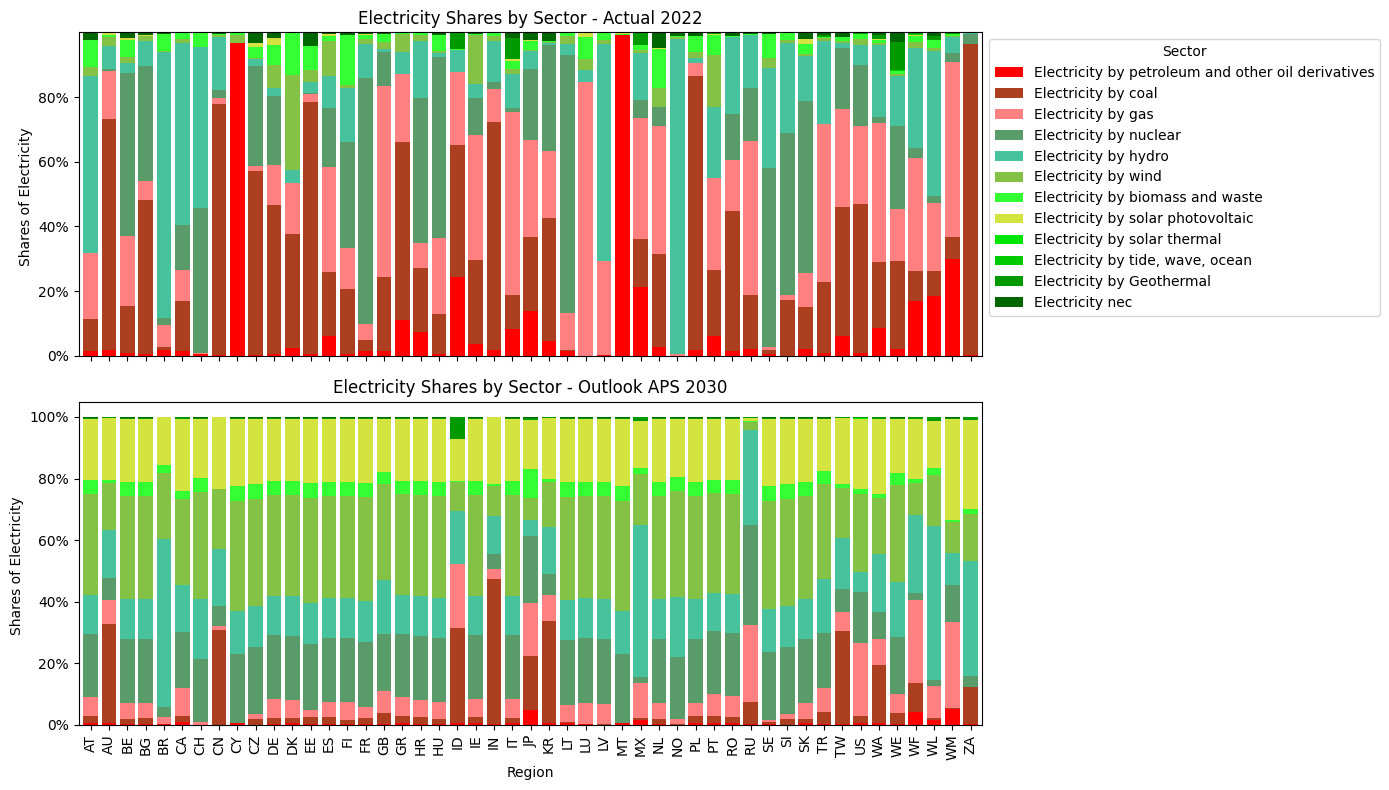

In [12]:


fig_width=14
fig_height=8
bar_width = 0.8

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(fig_width, fig_height),sharex=True)

data = outlook_pivot_actual
data.plot(kind='bar', stacked=True, width=bar_width ,ax=axes[0],color=[colors[col] for col in data.columns])
axes[0].set_title('Electricity Shares by Sector - Actual 2022')
axes[0].set_ylabel('Shares of Electricity ')
axes[0].set_xlabel('Region')
axes[0].legend(title='Sector', bbox_to_anchor=(1, 1), loc='upper left')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0))


data = outlook_pivot_APS
data.plot(kind='bar', stacked=True, width=bar_width ,ax=axes[1],color=[colors[col] for col in data.columns])
axes[1].set_title('Electricity Shares by Sector - Outlook APS 2030')
axes[1].set_ylabel('Shares of Electricity ')
axes[1].set_xlabel('Region')
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].get_legend().set_visible(False)

plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.savefig("charts/chart_emix_outlook_country.png", dpi=200, bbox_inches="tight")
plt.show()


In [7]:








#spacer

In [8]:
file_path = "inputs/input_sectors_group.csv"
sectors_list = pd.read_csv(file_path)

sector_agg = sectors_list["sector"].to_frame(name="original")
sector_agg = sector_agg.merge(sectors_list, left_on="original", right_on="sector", how="outer")
sector_agg["aggregated"] = sector_agg["classification"].fillna("Others") 
sector_agg = sector_agg[["original","aggregated"]]

In [9]:
demand = "normal"
stage ="manufacturing"
year = 2030
vehicles = "BEV"
scenario = "Projection-APS"
emix_list = ["ori","APS2030"] # comparing original without emix, with emix from APS in year 2030

emission_all = pd.DataFrame() # start collecting data 
emission_dict = {}

for emix in emix_list:
    file_path = "outputs/emission_emix_sectors_"+stage+"_"+demand+"_"+emix+".csv"
    emission = pd.read_csv(file_path)

    emission = emission[emission.stage == stage]
    emission = emission[emission.scenario == scenario]
    emission = emission[emission.year == year]
    emission.emission = emission.emission * 0.001 # giga to ton ? or just use giga as metric ton
    #emission.emission = emission.emission * 1000 # giga to ton ? or just use giga as metric ton

    emission["emix"] = emix
    emission_dict[emix] = emission
    

emission_all = pd.concat([emission_dict[emix_list[0]],emission_dict[emix_list[1]]],axis=0)

emission_all = emission_all.pivot_table(index=["region","sector","vehicles"],values="emission",columns="emix")
emission_all["difference"] = emission_all['APS2030'] - emission_all['ori']
emission_all.reset_index(inplace=True)

# choose the case of BEV
emission_merged = emission_all[emission_all.vehicles == vehicles]

# separate into electricity sector and non electricity sector
emission_merged_elec = emission_merged[emission_merged['sector'].str.contains('Electricity')]
emission_merged_non_elec = emission_merged[~emission_merged['sector'].str.contains('Electricity')]

In [10]:
top_sector_number = 20

top_sectors = emission_merged_non_elec.groupby(['sector'])['difference'].sum().reset_index().sort_values(by="difference",ascending=True).head(top_sector_number)
emission_top = emission_merged_non_elec[emission_merged_non_elec.sector.isin(top_sectors["sector"].tolist())]

emission_pivot_non_elec = emission_top.pivot_table(index="sector",values="difference",columns="region")
emission_pivot_non_elec["total"] = emission_pivot_non_elec["EU"] + emission_pivot_non_elec["Non EU"]


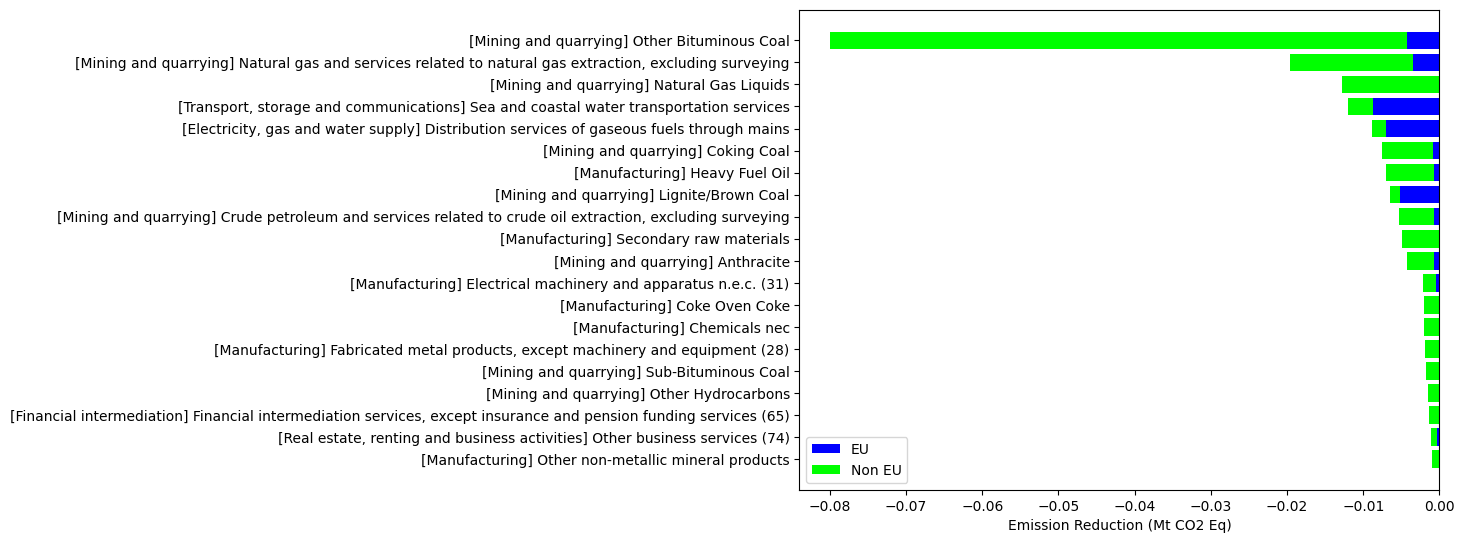

In [11]:
data = emission_pivot_non_elec.reset_index()
data = data.sort_values(by="total",ascending=False)

data = data.merge(sector_agg, left_on="sector", right_on="original", how="inner").drop(columns="original")

fig_width = 8
fig_height = 6

plt.figure(figsize=(fig_width, fig_height))
plt.barh("["+data['aggregated']+"] "+data['sector'], data['EU'], color='blue',label='EU')
plt.barh("["+data['aggregated']+"] "+data['sector'], data['Non EU'], left=data['EU'], color='lime', label='Non EU')

# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
#plt.title("Emission Reduction from new "+scenario+" Energy Mix \n during "+stage+" "+vehicles+" in "+year+"\n"+" from Non Electricity Sectors", fontweight="bold", loc="center")
plt.xlabel("Emission Reduction (Mt CO2 Eq)")
plt.legend()
plt.savefig("charts/chart_emix_emission_reduction_non_elec_"+stage+"_"+vehicles+".png", dpi=300,  bbox_inches='tight')
plt.show()

In [12]:
emission_pivot_elec = emission_merged_elec.pivot_table(index="sector",values="difference",columns="region")
emission_pivot_elec["total"] = emission_pivot_elec["EU"] + emission_pivot_elec["Non EU"]
emission_pivot_elec

region,EU,Non EU,total
sector,,,
Electricity by Geothermal,0.000008,0.002443,0.002452
Electricity by biomass and waste,0.001692,0.082834,0.084526
Electricity by coal,-0.561938,-7.486497,-8.048435
Electricity by gas,-0.081110,-1.086012,-1.167123
Electricity by hydro,0.000629,0.001379,0.002008
Electricity by nuclear,-0.000071,0.000307,0.000236
Electricity by petroleum and other oil derivatives,-0.032103,-0.633647,-0.665750
Electricity by solar photovoltaic,0.258708,1.310726,1.569433
Electricity by solar thermal,-0.001844,0.000630,-0.001214


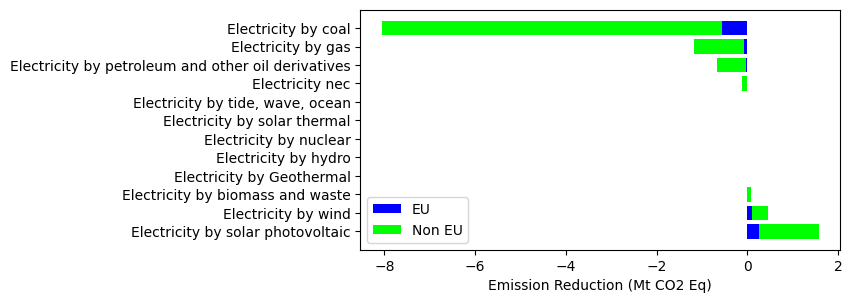

In [13]:
data = emission_pivot_elec.reset_index()
data = data.sort_values(by="total",ascending=False)

fig_width = 6
fig_height = 3

plt.figure(figsize=(fig_width, fig_height))
plt.barh(data['sector'], data['EU'], color='blue',label='EU')
plt.barh(data['sector'], data['Non EU'], left=data['EU'], color='lime', label='Non EU')

# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0)
#plt.title("Emission Reduction from New Energy Mix in "+stage+" \n from Electricity Sectors", fontweight="bold", loc="center")
plt.xlabel("Emission Reduction (Mt CO2 Eq)")
plt.legend()
plt.savefig("charts/chart_emix_emission_reduction_elec_"+stage+"_"+vehicles+".png", dpi=300,  bbox_inches='tight')
plt.show()

In [14]:








#SPACER

In [15]:
scenario = "Projection-APS"
year = "2030"

file_path = "outputs/emission_emix_all_"+scenario+"_"+demand+"_"+year+".csv"
emission = pd.read_csv(file_path)
emission["emission"] = emission["emission"] * 0.001 # from Gg to Mt
emission_pivot = emission.pivot_table(columns="stage",index=["emix","vehicles"],values="emission",aggfunc="sum")

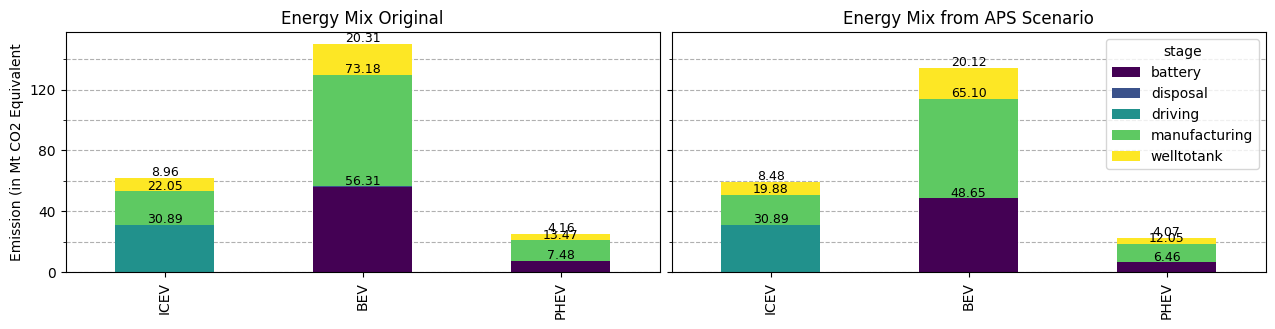

In [16]:
fig_width = 20
fig_height = 4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(fig_width,fig_height), sharey=True)

emix_list = ["ori","APS2030"]
emix_label = {'ori':'Energy Mix Original',
                'APS2030':'Energy Mix from APS Scenario'}
colormap_par ="viridis"


for ax,emix in zip(axes,emix_list): 
    data = emission_pivot.loc[emix].loc[["ICEV","BEV","PHEV"]]
    data.plot(kind='bar', stacked=True, ax=ax, cmap=colormap_par)
    ax.set_title(f"{emix_label[emix]}")
    ax.set_ylabel('Emission (in Mt CO2 Equivalent')
    ax.set_xlabel(None)
    ax.get_legend().set_visible(False)
    
# Adjusting the grid lines
for ax in axes:
    ax.set_axisbelow(True)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of grid lines
    ax.grid(True, which='both', axis='y', linestyle='--', zorder=0)

# Adding total annotations on top of each bar
for ax in axes:
    for container in ax.containers:
        labels = [f'{v.get_height():,.2f}' if v.get_height() >= 1 else '' for v in container]
        ax.bar_label(container, label_type='edge', labels=labels, fontsize=9,padding=-1)

axes[-1].get_legend().set_visible(True)
    
#fig.suptitle('Emission across vehicles and stages in Year 2030')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2, wspace=0.02)
plt.savefig("charts/chart_emix_emission_by_stage_"+scenario+".png", dpi=100,  bbox_inches='tight')
plt.show()


In [17]:
emission_all = emission_pivot.sum(axis=1).to_frame().pivot_table(columns="emix",index="vehicles",values=0)
emission_all["differences"] = emission_all["APS2030"] - emission_all["ori"] 
emission_all = emission_all[["ori","APS2030","differences"]]

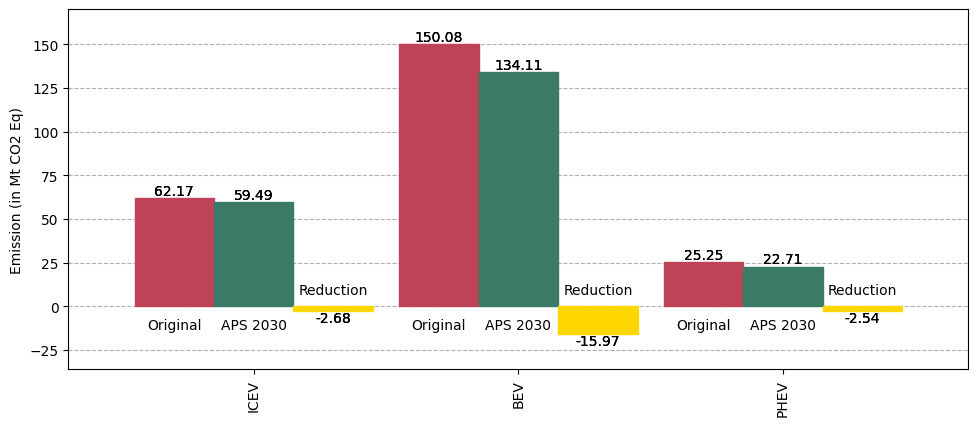

In [18]:
fig_width = 15
fig_height = 6

colors = ['#bf4358','#3a7a67','gold']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width,fig_height),sharey=True)

data = emission_all.loc[["ICEV","BEV","PHEV"]]
data.plot(kind='bar', ax=ax, width = 0.9)
#ax.set_title(f"{emix_label[emix]}")
ax.set_ylabel('Emission (in Mt CO2 Eq)')
ax.set_xlabel(None)
ax.get_legend().set_visible(False)
ax.set_axisbelow(True)
ax.grid(True, which='both', axis='y', linestyle='--', zorder=0)
    
# Adding text labels near the bars
bar_labels = ['Original', 'APS 2030', 'Reduction']
for i, container in enumerate(ax.containers):
    for bar in container:
        height = 5 if bar.get_height() < 0 else -15
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{bar_labels[i]}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
        )
        bar.set_color(colors[i])
    
    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='%.2f')

y_min = emission_all.min().min() - 20  # Subtracting a bit more to ensure space for labels
y_max = emission_all.max().max() + 20  # Adding a bit more to ensure space for labels
ax.set_ylim(y_min, y_max)

#fig.suptitle('Emission across vehicles and stages in Year 2030')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2, wspace=0.02)
plt.savefig("charts/chart_emix_emission_reduction_summary.png", dpi=300,  bbox_inches='tight')
plt.show()
